# 錯視の実験

## 使用した錯視

[NTT イリュージョンフォーラム](http://www.kecl.ntt.co.jp/IllusionForum/)で公開されている，[形の恒常性（錯視，形の錯視）](http://www.kecl.ntt.co.jp/IllusionForum/v/sizeConstancy/ja/index.html)を参考に，錯視を作成した．
<br>
これは，アメリカの心理学者であるシェパードが発見したもので，三次元的奥行き（遠近線など）がある平面上の絵の中に，同じ大きさの図を2つ配置すると，画面上側に配置された図の方が小さく見える錯視である．
<br>
この錯視は[ポンゾ錯視](http://www.kecl.ntt.co.jp/IllusionForum/v/ponzo/ja/index.html)と関係が深く，大きさの判断が奥行きに依存していることを示すものである．

## 実験手続き

### 実験準備
1. 奥行きを感じるようにオブジェクトなどが配置された二次元上の平面図（今回はPCの画面）上に，赤い円を2つ配置する．画面上側の円を**「基準円」**と，画面下側の円を**「刺激円」**と呼ぶ．基準円の半径は100piexl，刺激円の半径は100〜160pixel（7段階，10pixel刻み）である．
2. 実験として，7条件$\times$20試行の合計140試行を行う．条件のカウンタバランスをとるため，7段階の刺激円の提示順を乱数を用いてランダマイズする．
3. 2の作業を20回繰り返し，統制されたランダム順を作成する．

### 実験手続き
1. 実験参加者は，実験プログラムを起動する．
2. 実験参加者は画面中央のクロスマークを見ながら，右側の円（刺激円）が左側の円（基準円）より画面上で大きく見えるかどうか，2択で回答する．この時，刺激円の半径は実験準備で作成されたランダム順に応じて変更，提示される．
3. 2を全試行（140回）繰り返す．

### 実験システム画面
![実験画面](capture.png )

## 実験結果

## 実験結果（集計）

In [34]:
import numpy as np
import pandas as pd

x = np.array([0, 10, 20, 30, 40, 50, 60], dtype=np.uint64)
y = np.array([0.00, 0.00, 0.25, 0.80, 1.00, 1.00, 1.00], dtype=np.float64)
sem =  np.array([0.0, 0.0, 0.099339927, 0.091766294, 0.0, 0.0, 0.0], dtype=np.float64)

xlabel = "distance of radius between base-circle and stimulation-circle (pixel)"
ylabel = "mean accuracy"

index = [ylabel, "standard error of the mean"]

df = pd.DataFrame(np.array([y, sem]), columns=x, index=index)
df

,0,10,20,30,40,50,60
mean accuracy,0.0,0.0,0.25000,0.800000,1.0,1.0,1.0
standard error of the mean,0.0,0.0,0.09934,0.091766,0.0,0.0,0.0


## 実験結果（図）

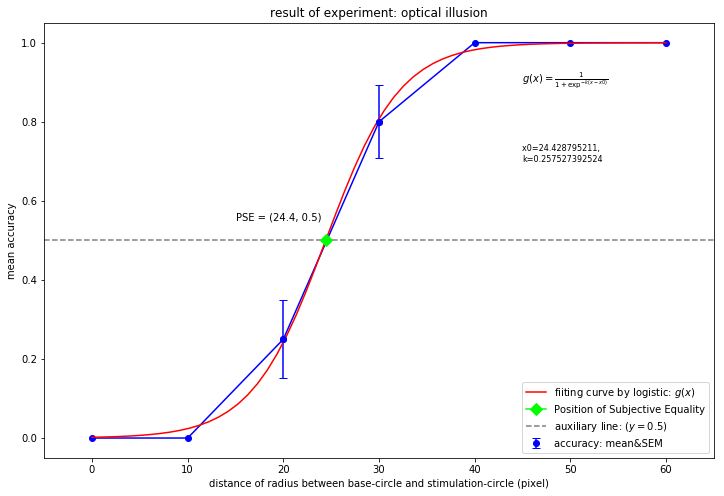

In [41]:
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%matplotlib inline

def logistic(x, x0, k):
    out = 1 / (1 + np.exp(-k*(x-x0)))
    return out

xmin = -5
xmax = 65

# curve fitting
popt, pcov = curve_fit(logistic, x, y)
#print(popt)
#function  ="1 / (1 + exp(-%.2f*(x-%.2f)" %(popt[1], popt[0])
#print(function)
curve_x = np.linspace(0, 60, 60)
curve_y = logistic(curve_x, *popt)


# searching PSE (point of subjective equality)
search_x = np.linspace(0, 60, 500)
search_y = 0
target = 0
for i in search_x :
    temp = logistic(i, *popt)
    if np.abs(0.5-temp) < np.abs(0.5-search_y) :
        target = i
        search_y = temp
        if search_y == 0.5 :
            break

            
plt.figure(figsize=(12, 8))

plt.plot(x, y, marker="o", color="blue")
plt.errorbar(x[2:4], y[2:4], fmt="bo", yerr=sem[2:4], ecolor='blue', capsize=4, label="accuracy: mean&SEM")

# drawing auxiliary line: y=0.5
plt.hlines([0.5], xmin, xmax, color="gray", linestyles='dashed', label="auxiliary line: "+r"($y=0.5$)")

# drawing fitted curve
plt.plot(curve_x, curve_y, color="red", label="fiiting curve by logistic: "+r"$g(x)$")

# drawing about logistic fanction: g(x)
plt.text(45, 0.9, r"$g(x)=\frac{1}{1+\exp^{-k(x-x0)}}$")
plt.text(45, 0.7, "x0=%s, \nk=%s" %(popt[0], popt[1]), fontsize=8)

# drawing about PSE (Point of Subjective Equality)
plt.plot([target], [0.5], color="lime", marker="D", ms=8, label="Position of Subjective Equality")
plt.text(15, 0.55, "PSE = (%.1f, 0.5)" %target)



plt.legend(loc="lower right")

plt.xlim(xmin, xmax)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("result of experiment: optical illusion")

plt.show()


### 実験結果（まとめ）
* 実験結果に対してカーブフィッティングを行い，実験で利用しなかった基準円と刺激円の半径の差分についても，おおよその半径差分がわかるようにした．
* その結果，刺激円の半径が基準円の約1.244倍になる時に，基準円と刺激円の大きさが同じに見えているとわかる
* つまり，基準円は本来の大きさと比べて約80%の大きさで見えていることがわかる．
* 刺激円の半径が基準円の1.4倍を超えると，刺激円が基準円より小さく見えることはなくなることがわかる．
* 刺激円の半径が基準円の1.1倍を超えないと，刺激円が基準円より大きく見えることはないとわかる．

## 実験データ
### 添付ファイル
* 実験プログラム：visual_information_2.pde
* グラフ描画，カーブフィッティングプログラム：graph.py
* 実験結果：rslt.csv

### [Github](https://github.com/YK-Orfeluna/visual_information/tree/master/visual_information_2)
* [実験プログラム](visual_information_2.pde)
* [グラフ描画，カーブフィッティングプログラム](graph.py)
* [実験結果](rslt.csv)
* [結果グラフ](rslt.png)
* [レポート](report.ipynb)


